**Problem Statement**
=====================

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

**Background**
------------

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

**Objective**
----------

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**Task**
-----

The company wants to know:

* **Which variables are significant in predicting the demand for shared bikes.**
* **How well those variables describe the bike demands**

**Dataset**
----------

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

**Business Goal**
----------------

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Data Cleaning and Manipulation

### Imports and Initial Setup

In [464]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
from tabulate import tabulate
from IPython.display import display, HTML
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', None)     # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_colwidth', 25) 

# Suppress warnings
warnings.filterwarnings('ignore')

### Loading Data

In [465]:
df=pd.read_csv("day.csv")
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [466]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [467]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [468]:
df.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [469]:
df.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### InSight: There are no null values.

In [470]:
df.shape

(730, 16)

**Checking Percentage of Missing Values**
1. **Ensures data quality and integrity**: Verifies that data is accurate and reliable.
2. **Identifies potential biases**: Reveals missing values that could skew analysis and modeling results.
3. **Determines need for data imputation or interpolation**: Indicates whether missing values need to be filled or estimated.
4. **Avoids reduced performance**: Prevents missing values can impact negatively .
5. **Reduces risk of overfitting or underfitting**: Ensures that models are trained on complete and representative data.
6. **Informs data preprocessing and feature engineering decisions**: Guides choices about handling missing values and data preparation.
7. **Helps meet data quality thresholds**: Ensures that missing values are within acceptable limits (e.g., <5%, 5-10%, >10%).

In [471]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt


### Dropping Columns

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [472]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [473]:
df.drop(['instant', 'dteday','casual','registered'],  axis=1,inplace=True)

In [474]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt


In [475]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [476]:
df.dtypes

season          int64
year            int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
cnt             int64
dtype: object

In [477]:
#Print number of unique values in all column
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

**Data Types and Interpretation**
================================

### Categorical and Numerical Values
#### Columns 0-6
* **season**
* **year** Note: feature can be considered a categorical feature in the context of bike sharing demand analysis.
* **month**
* **holiday**
* **weekday**
* **workingday**
* **weathersit**
are integers (int64), likely representing categorical or numerical values.

### Continuous Values
#### Columns 7-10
* **temp**
* **atemp**
* **humidity**
* **windspeed**
are floating-point numbers (float64), likely representing continuous values.

### Count and Numerical Values
#### Columns 11-13
* **cnt**
is integer (int64), likely representing count or numerical values [our Target Variable].

## Outlier treatment

In [478]:
def get_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    return {'lower_bound': q1 - 1.5 * iqr, 'upper_bound': q3 + 1.5 * iqr}

def visualize_outliers(df, column):
    print('column',column)
    fig, p = plot.subplots(1, 2, figsize=(8, 4))
    sea.boxplot(df[column], ax=p[0], orient="h")
    p[0].set_title('Plot [' + column + '] - Original')
    new_df = df[(df[column] > get_iqr(df, column)['lower_bound']) & (df[column] < get_iqr(df, column)['upper_bound'])]
    sea.boxplot(new_df[column], ax=p[1], orient="h")
    p[1].set_title('Plot [' + column + '] - Post Outlier Treatment')
    plot.tight_layout()
    plot.show()

def remove_outliers(df, column):
    old_rows = len(df)
    iqr_bounds = get_iqr(df, column)
    new_df = df[(df[column] > iqr_bounds['lower_bound']) & (df[column] < iqr_bounds['upper_bound'])]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows) / old_rows * 100, 2), "%")
    return new_df

original_row_count 730
['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
column temp


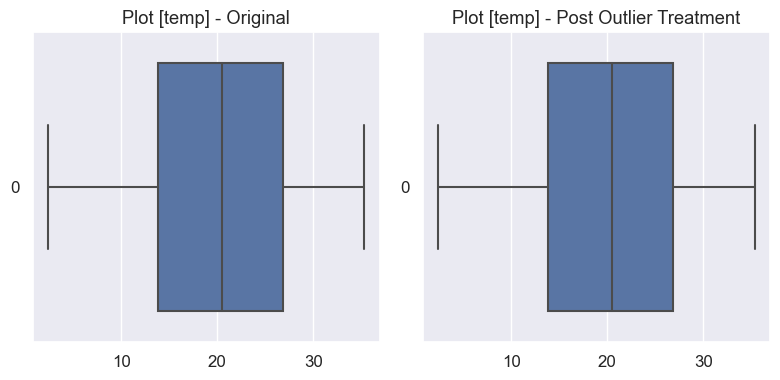

Rows dropped:  0
Percentage rows dropped:  0.0 %
column atemp


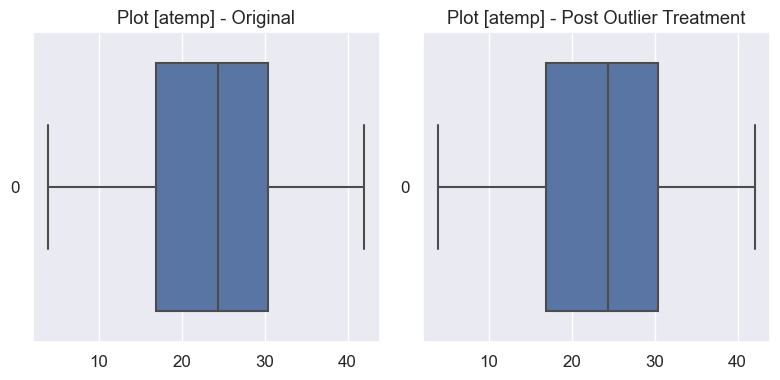

Rows dropped:  0
Percentage rows dropped:  0.0 %
column humidity


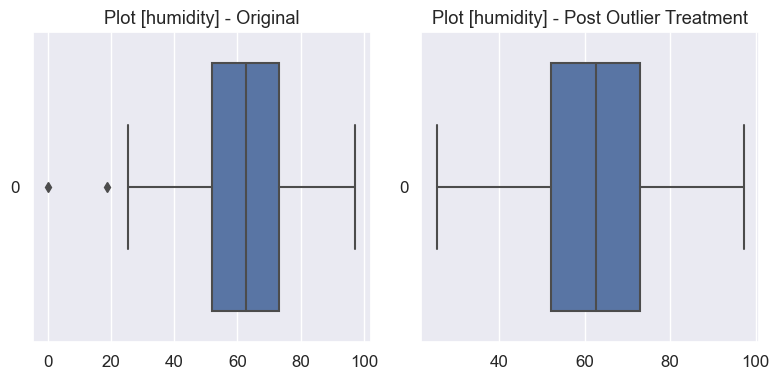

Rows dropped:  2
Percentage rows dropped:  0.27 %
column windspeed


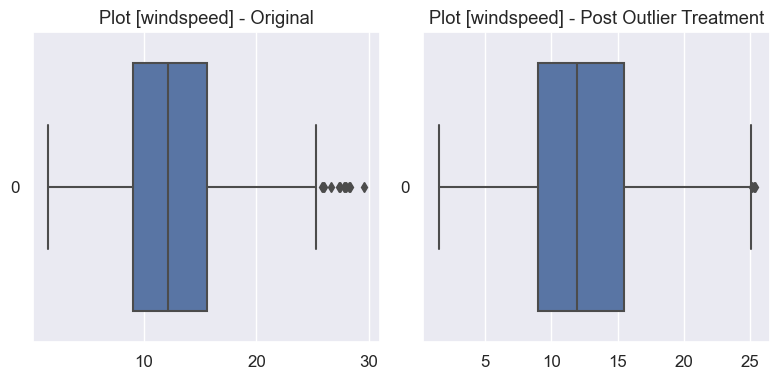

Rows dropped:  12
Percentage rows dropped:  1.65 %
column cnt


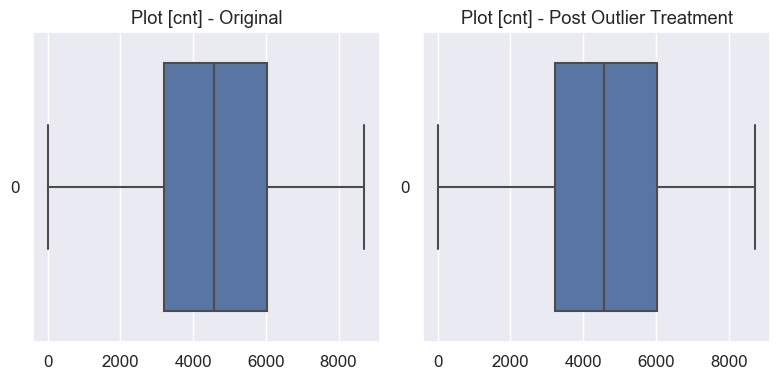

Rows dropped:  0
Percentage rows dropped:  0.0 %


716

In [479]:
original_row_count = len(df)
print('original_row_count',original_row_count)

outlier_treatment = ['temp','atemp','humidity','windspeed','cnt']
print(outlier_treatment)
for column in outlier_treatment:
    visualize_outliers(df, column)
    df = remove_outliers(df, column)
len(df)

**Data Cleaning Report**
==========================

* **Initial Dataset**: 730 rows
* **After Outlier Removal**: 716 rows
* **Outliers Removed**: 14 data points (1.9% of initial dataset)

### Features Engineering

In [480]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [481]:
def print_unique_values(columns, df):
    data = {'Column': [], 'Unique Values': []}
    for column in columns:
        unique_values = df[column].unique()
        data['Column'].append(column)
        data['Unique Values'].append(unique_values)
    return pd.DataFrame(data)

columns=['season','year','month','holiday','weekday','workingday','weathersit']
df_unique_values = print_unique_values(columns, df)
df_unique_values

,Column,Unique Values
0,season,"[1, 2, 3, 4]"
1,year,"[0, 1]"
2,month,"[1, 2, 3, 4, 5, 6, 7,..."
3,holiday,"[0, 1]"
4,weekday,"[6, 0, 1, 2, 3, 4, 5]"
5,workingday,"[0, 1]"
6,weathersit,"[2, 1, 3]"


# Encoding the featues having more than 2 unique values

# 1. Encoding/mapping the season column

In [482]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# 2. Encoding/mapping the month column

In [483]:
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# 3. Encoding/mapping the weekday column

In [484]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [485]:
df.weathersit = df.weathersit.map({1:'sunny',2:'cloudy',3:'rainy'})

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      716 non-null    object 
 1   year        716 non-null    int64  
 2   month       716 non-null    object 
 3   holiday     716 non-null    int64  
 4   weekday     716 non-null    object 
 5   workingday  716 non-null    int64  
 6   weathersit  716 non-null    object 
 7   temp        716 non-null    float64
 8   atemp       716 non-null    float64
 9   humidity    716 non-null    float64
 10  windspeed   716 non-null    float64
 11  cnt         716 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 88.9+ KB


In [487]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,sunny,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,sunny,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,sunny,9.305237,11.46350,43.6957,12.522300,1600


## 1. Univeriate Analysis

In [488]:
column_titles={
"season": "Season of the year",
"year": "Year of observation",
"month": "Month of observation",    
"holiday": "Holiday",
"weekday": "Weekday indicator",
"workingday": "Working day indicator",
"weathersit": "Weather situation",
"temp": "Temperature",
"atemp": "Apparent temperature",
"humidity": "Relative humidity",
"windspeed": "Wind speed",
"cnt": "Total bike users"
}

In [489]:
def univariate_analysis(df, columns):
    num_columns = len(columns)
    fig, p = plot.subplots(num_columns, 2, figsize=(16, 4*num_columns))
    for i, column in enumerate(columns):
        sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[i, 0])
        sea.boxplot(x=column, data=df, ax=p[i, 1])
        p[i, 0].set_xlabel(column_titles[column])
        p[i, 1].set_xlabel(column_titles[column])
        p[i, 0].set_yticks([])
        p[i, 1].set_yticks([])
        p[i, 1].set_xticklabels(p[i, 1].get_xticklabels())
        mode_value = df[column].mode().values[0]
        p[i, 1].axvline(x=mode_value, color='red', linestyle='--', label='Mode')
        min_value = df[column].min()
        max_value = df[column].max()
        # Find the range where most of the values are present
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        p[i, 0].annotate(f'Most values between {q1} and {q3}', xy=(0, 1.1), xycoords='axes fraction', ha='left', va='bottom')
        p[i, 0].annotate(f'Range: {min_value} - {max_value}', xy=(0, 1.0), xycoords='axes fraction', ha='left', va='bottom')
        p[i, 0].annotate(f' ', xy=(0, 0.9), xycoords='axes fraction', ha='left', va='bottom')  # Add a newline
        p[i, 0].annotate(f'{i+1}.Univariate analysis of {column_titles[column]}', xy=(0.5, 1.2), xycoords='axes fraction', ha='center', va='bottom', fontsize=12, fontweight='bold')
        new_row = pd.DataFrame({'Feature': [column_titles[column]], 'Most values between': [f'{q1} - {q3}'], 'Range': [f'{min_value} - {max_value}']})
        
    plot.tight_layout()
    plot.show()
    

## a.Quantitative Variable Analysis

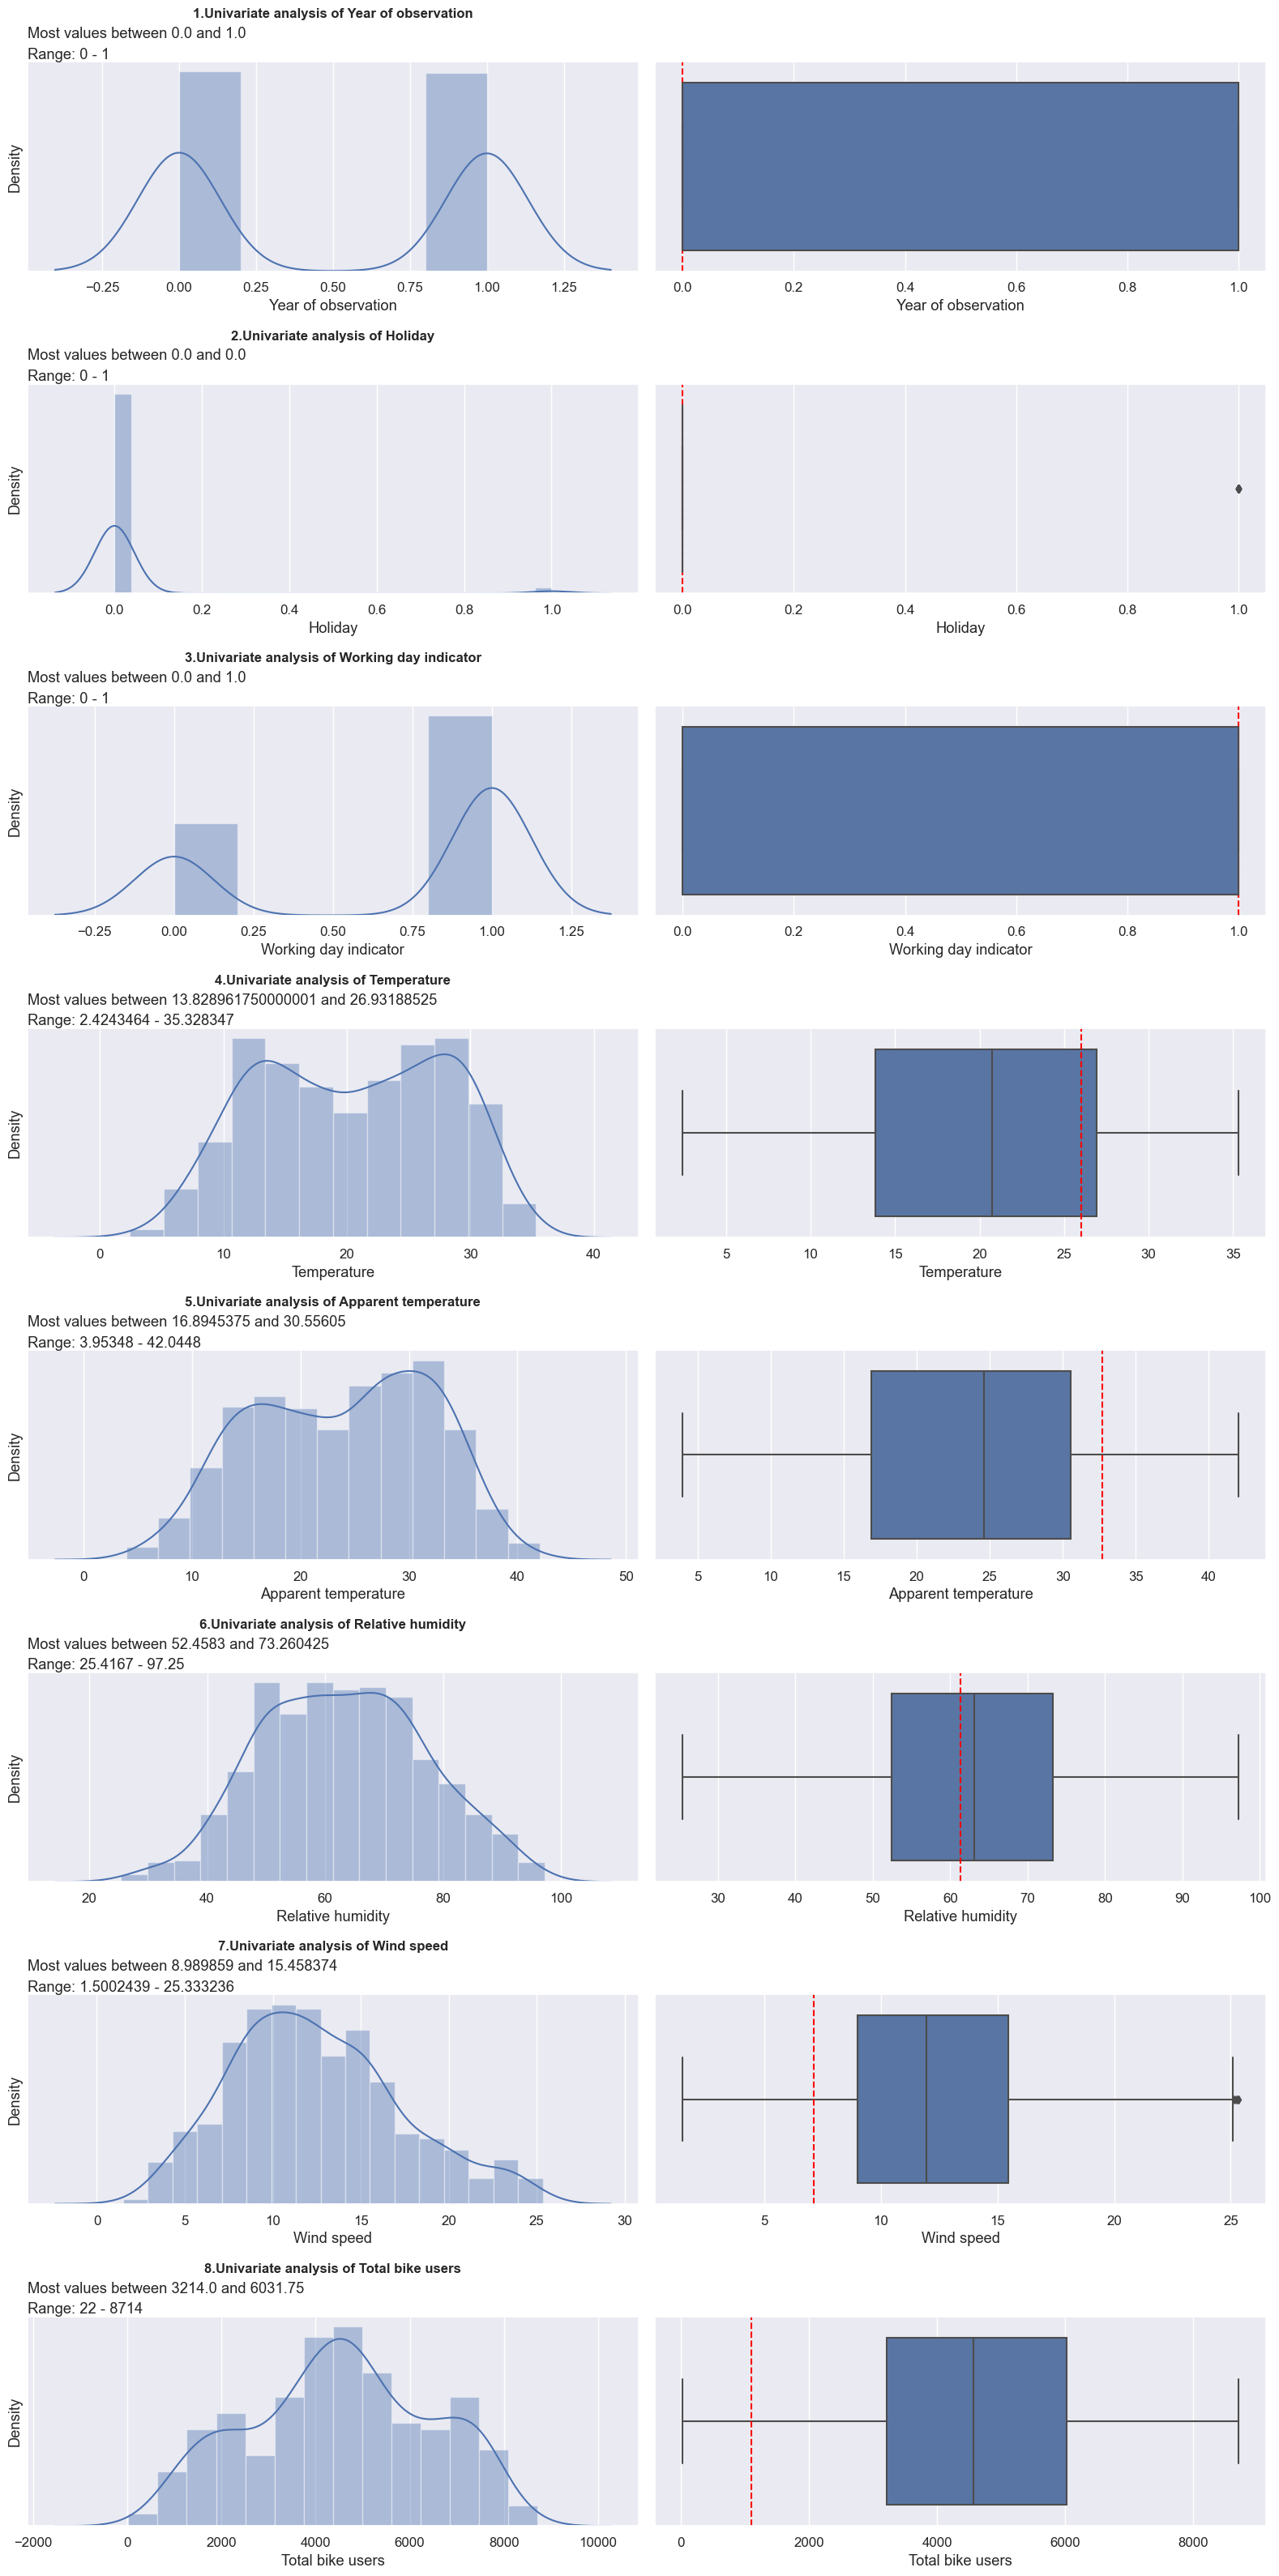

In [490]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
univariate_analysis(df,numerical_columns)

## Categorical Variable Analysis


In [491]:
object_columns = df.select_dtypes(include=[object]).columns

In [492]:
object_columns

Index(['season', 'month', 'weekday', 'weathersit'], dtype='object')

In [493]:

def plot_column_distribution(df, columns_info):
    """
    Plot the distribution of multiple columns in a dataframe.

 Parameters:
    df (pandas.DataFrame): The input dataframe.
    columns_info (list): A list of objects containing column information.
        Each object should have the following properties:
            - column (str): The column name.
            - title (str): The title of the plot.
            - xlabel (str): The label for the x-axis.
            - ylabel (str): The label for the y-axis.
    """
    for column_info in columns_info:
        column = column_info['column']
        title = column_info['title']
        xlabel = column_info['xlabel']
        ylabel = column_info['ylabel']
        df[column].value_counts().plot.bar(title=title, xlabel=xlabel, ylabel=ylabel, rot=45)
        plot.show()

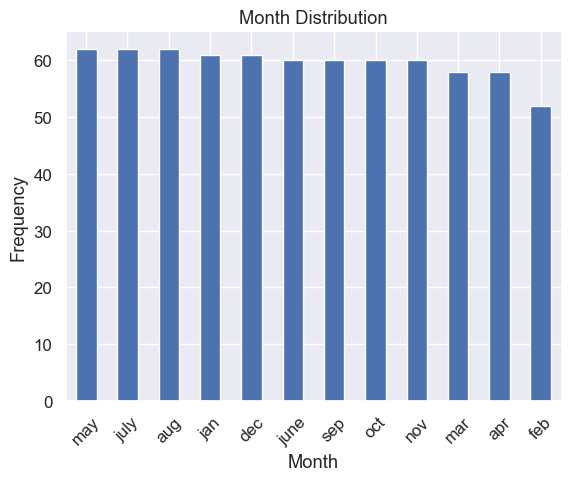

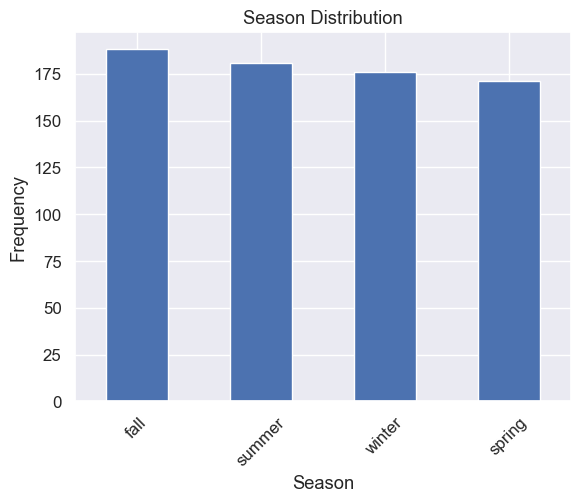

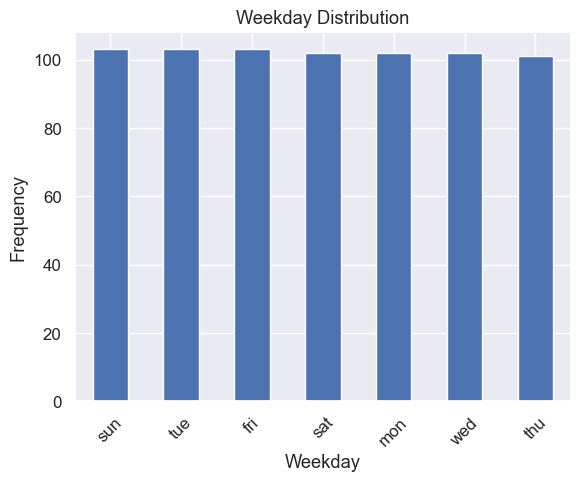

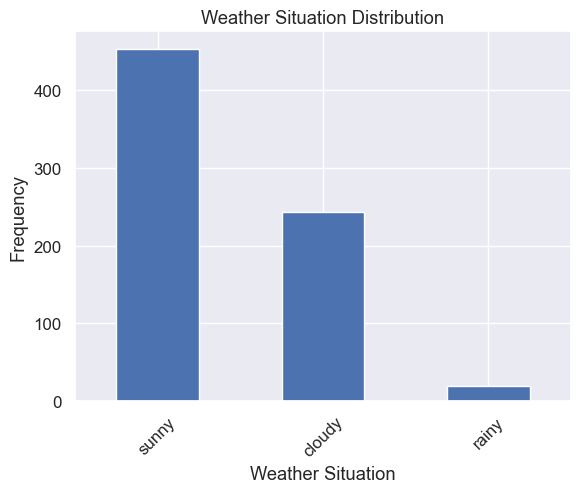

In [494]:
ordered_columns_info = [
     {'column': 'month', 'title': 'Month Distribution', 'xlabel': 'Month', 'ylabel': 'Frequency'},
    {'column': 'season', 'title': 'Season Distribution', 'xlabel': 'Season', 'ylabel': 'Frequency'},
    {'column': 'weekday', 'title': 'Weekday Distribution', 'xlabel': 'Weekday', 'ylabel': 'Frequency'}
]
unordered_columns_info = [
{'column': 'weathersit', 'title': 'Weather Situation Distribution', 'xlabel': 'Weather Situation', 'ylabel': 'Frequency'}
]

plot_column_distribution(df, ordered_columns_info)
plot_column_distribution(df, unordered_columns_info)

**Insights:**
- **More and almost similar average count of rented bikes in August, June, September, July followed by May, October. Company should make sure they prepare with high availability during these months**
- **December, January, February have the least demand probably due to winter season**

**Insights:**
- **It clearly shows that if the weather is clear, the demand is more**
- **If the weather is bad, demand decreases drastically**
- **Company should leverage and look up for forecast of weather to fullfill demands**

## Bivariate Analysis

In [495]:
def series_plot(df, column, hue=None, annot=1, annot_format='{:.1f}%'):
    # Calculate plot width based on category count
    plot_width = len(df[column].unique()) * 1.5
    
    # Create figure and axis
    fig, ax = plot.subplots(figsize=(plot_width, 7))
    
    # Create count plot with optional hue mapping
    ax = sea.countplot(data=df, x=column, order=df[column].value_counts().index, hue=hue)
    # Add title and labels
    ax.set_title('Count Plot of {}'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
    # Show plot
    plot.show()

## Relationship between cnt and Categorical Variable

In [496]:
def display_relationship(cnt, categorical_variables, data):
    """
    Display the relationship between cnt and multiple categorical variables using bar charts.

    Parameters:
     cnt (str): The column name for the total bike users.
     categorical_variables (list): A list of column names for the categorical variables.
     data (pandas.DataFrame): The dataset containing the cnt and categorical variable columns.
    """
    for variable in categorical_variables:
        # Group the data by the categorical variable and calculate the mean cnt
        grouped_data = data.groupby(variable)[cnt].mean()

        # Plot the bar chart
        plot.figure(figsize=(8, 6))
        plot.bar(grouped_data.index, grouped_data.values)
        plot.xlabel(variable)
        plot.ylabel('Rentals Count')
        plot.title('Bike Rentals By '+ variable )
        plot.show()

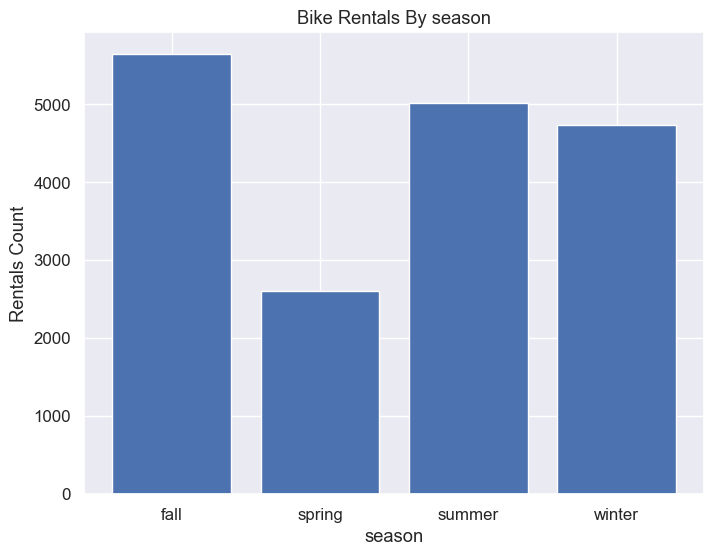

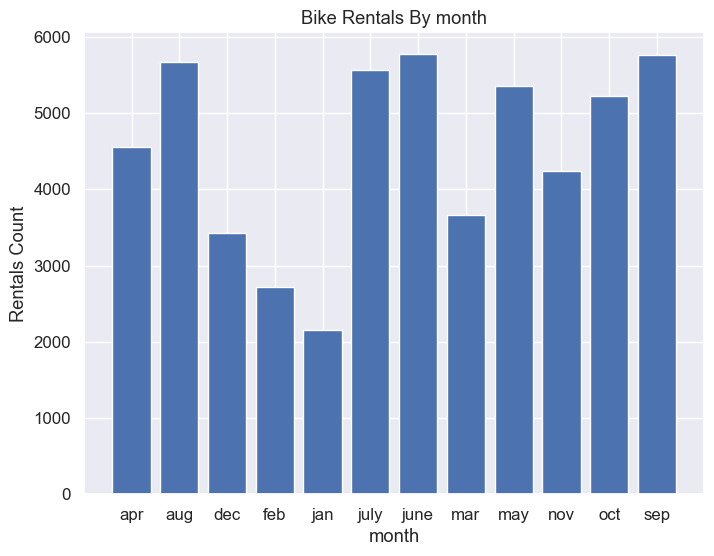

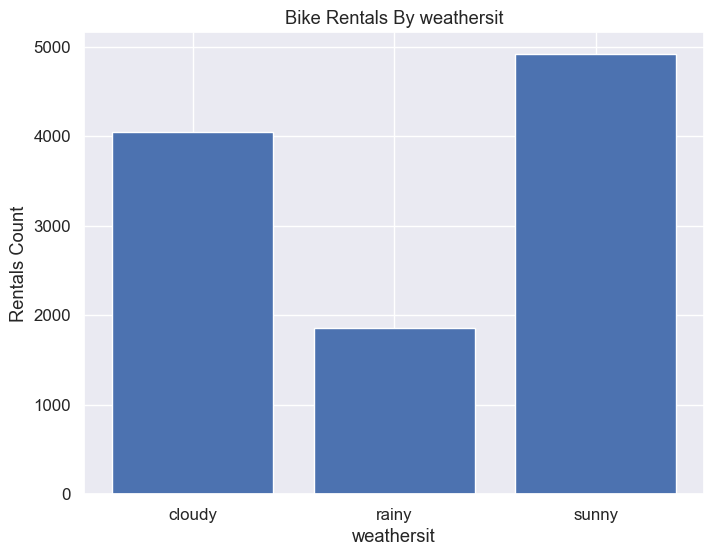

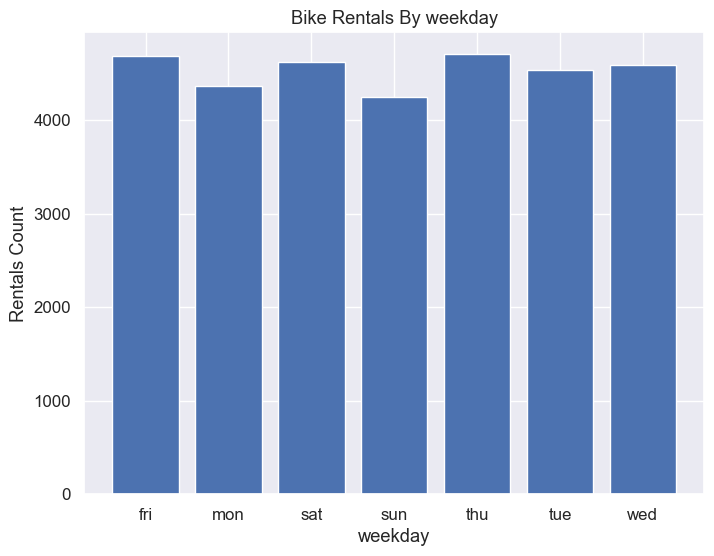

In [497]:
list_of_categorical_feature=['season','month','weathersit','weekday']
display_relationship('cnt',list_of_categorical_feature,df)

# Insight 

# Year and holiday with Bike sharing count

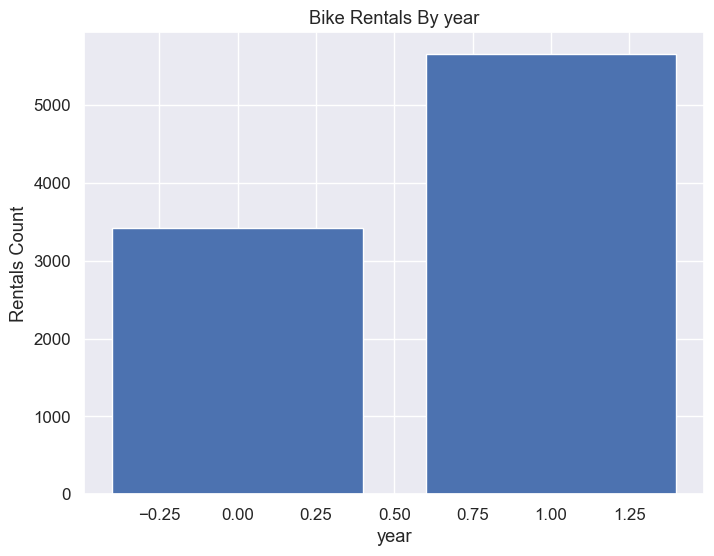

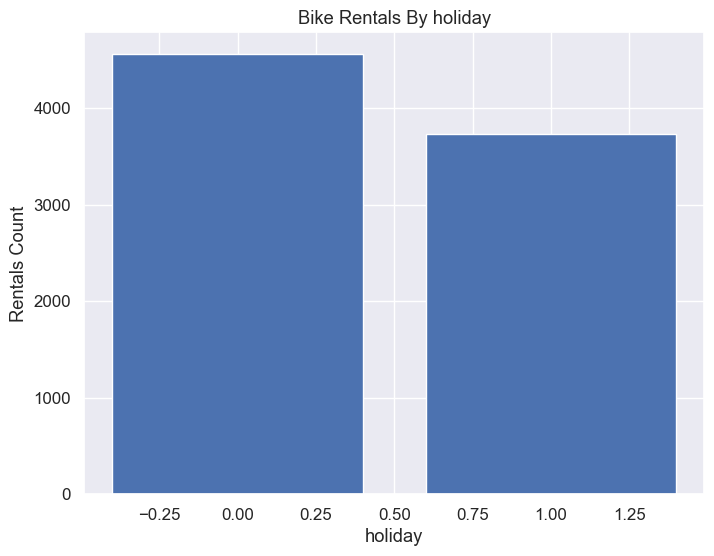

In [498]:
list_of_categorical_feature=['year','holiday']
display_relationship('cnt',list_of_categorical_feature,df)

# Insight:

In [499]:
def display_relationship_with_cnt(data, continuous_variables):
    """
    Display the relationship between cnt and a list of continuous numerical variables.

    Parameters:
     data (pandas.DataFrame): The dataset containing the cnt and numerical variable columns.
     continuous_variables (list): A list of column names for the continuous numerical variables.
    """
    for variable in continuous_variables:
        plot.figure(figsize=(8, 6))
        sea.scatterplot(x=variable, y='cnt', data=data)
        plot.title('Bike Sharing Count vs ' + variable)
        plot.show()

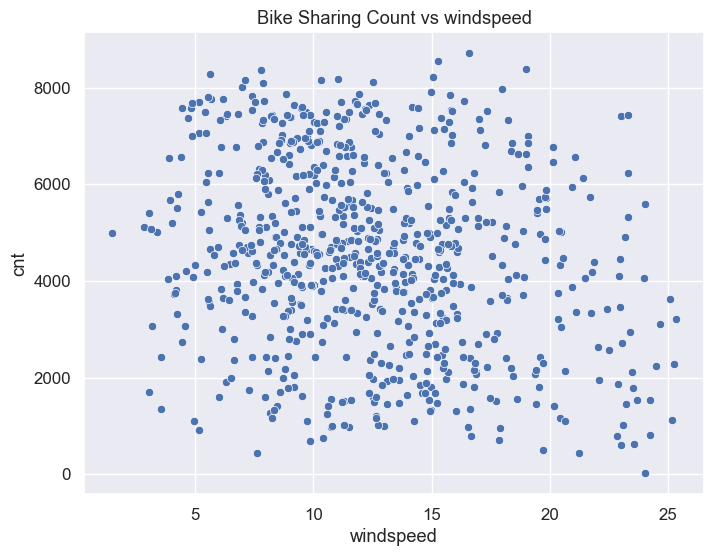

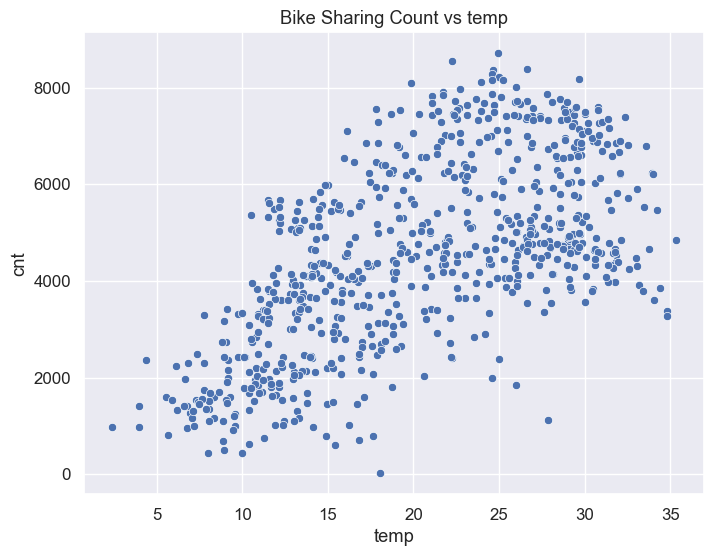

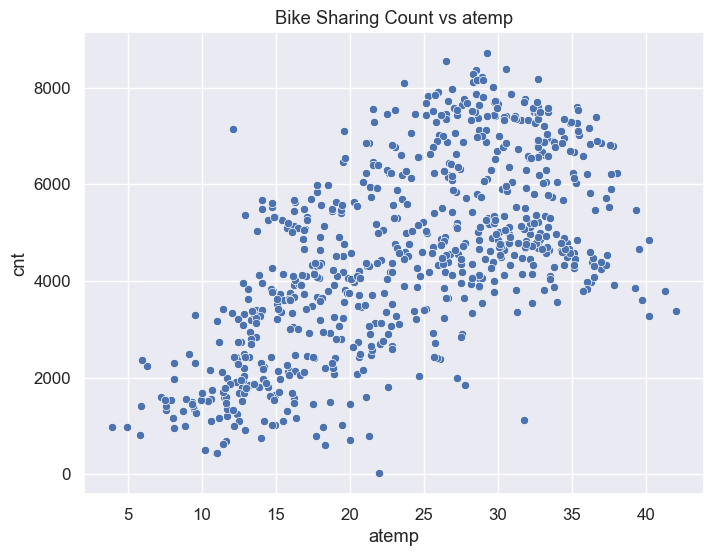

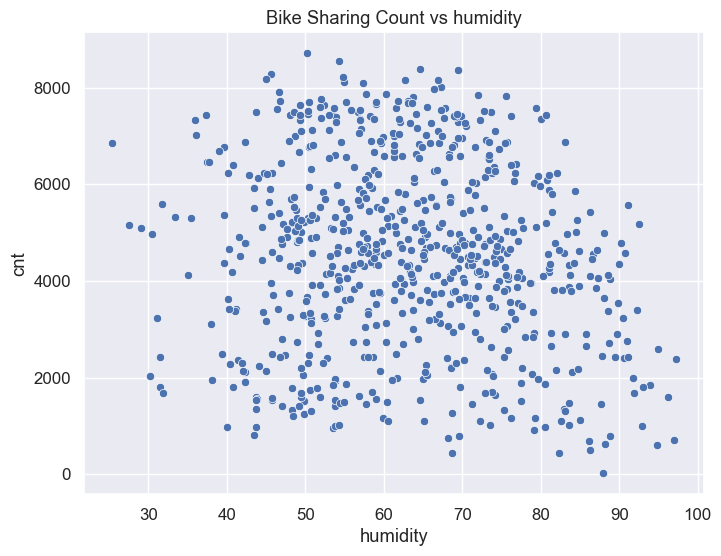

In [500]:
list_of_continous_variable=['windspeed','temp','atemp','humidity']
display_relationship_with_cnt(df,list_of_continous_variable)

# Insight:

### Multivariant Analysis

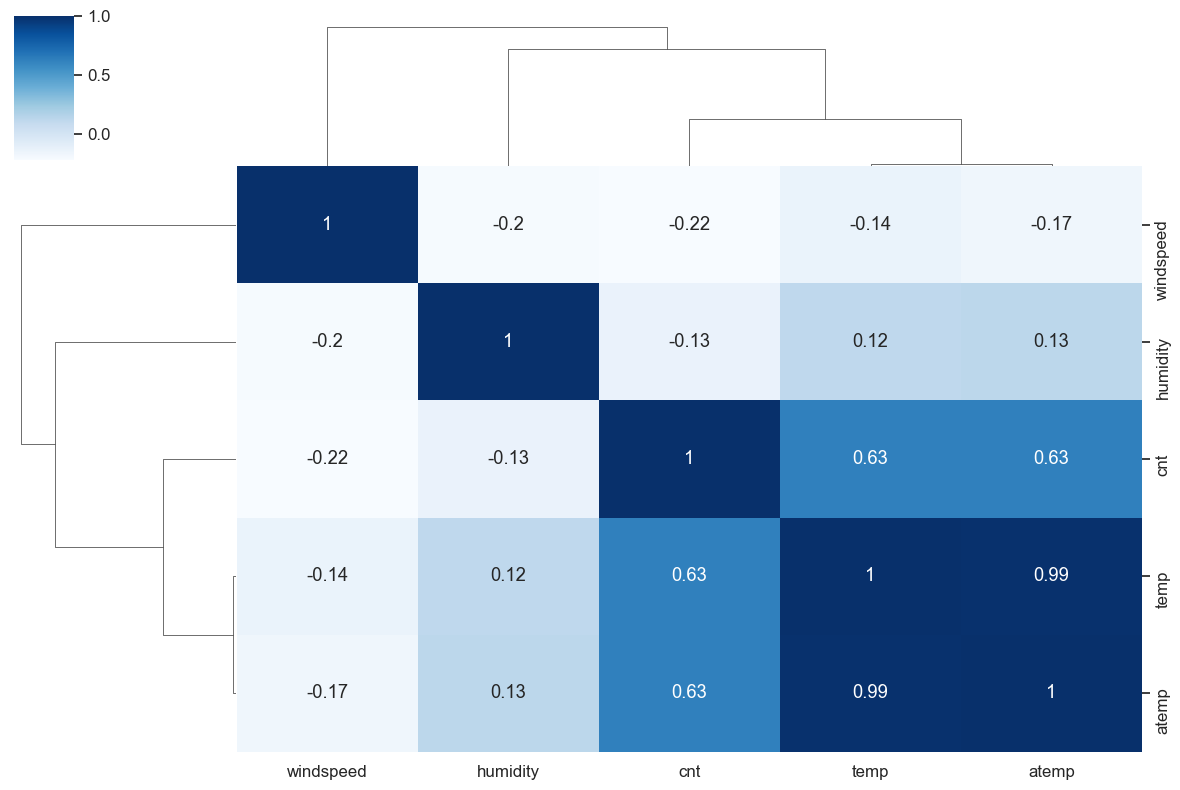

In [501]:
#Checking heatmap for continous numerical variables
numerical_columns =['cnt', 'temp', 'atemp', 'humidity','windspeed']
corr = df[numerical_columns].corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

#### _`Insight`_: 
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 
#### Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

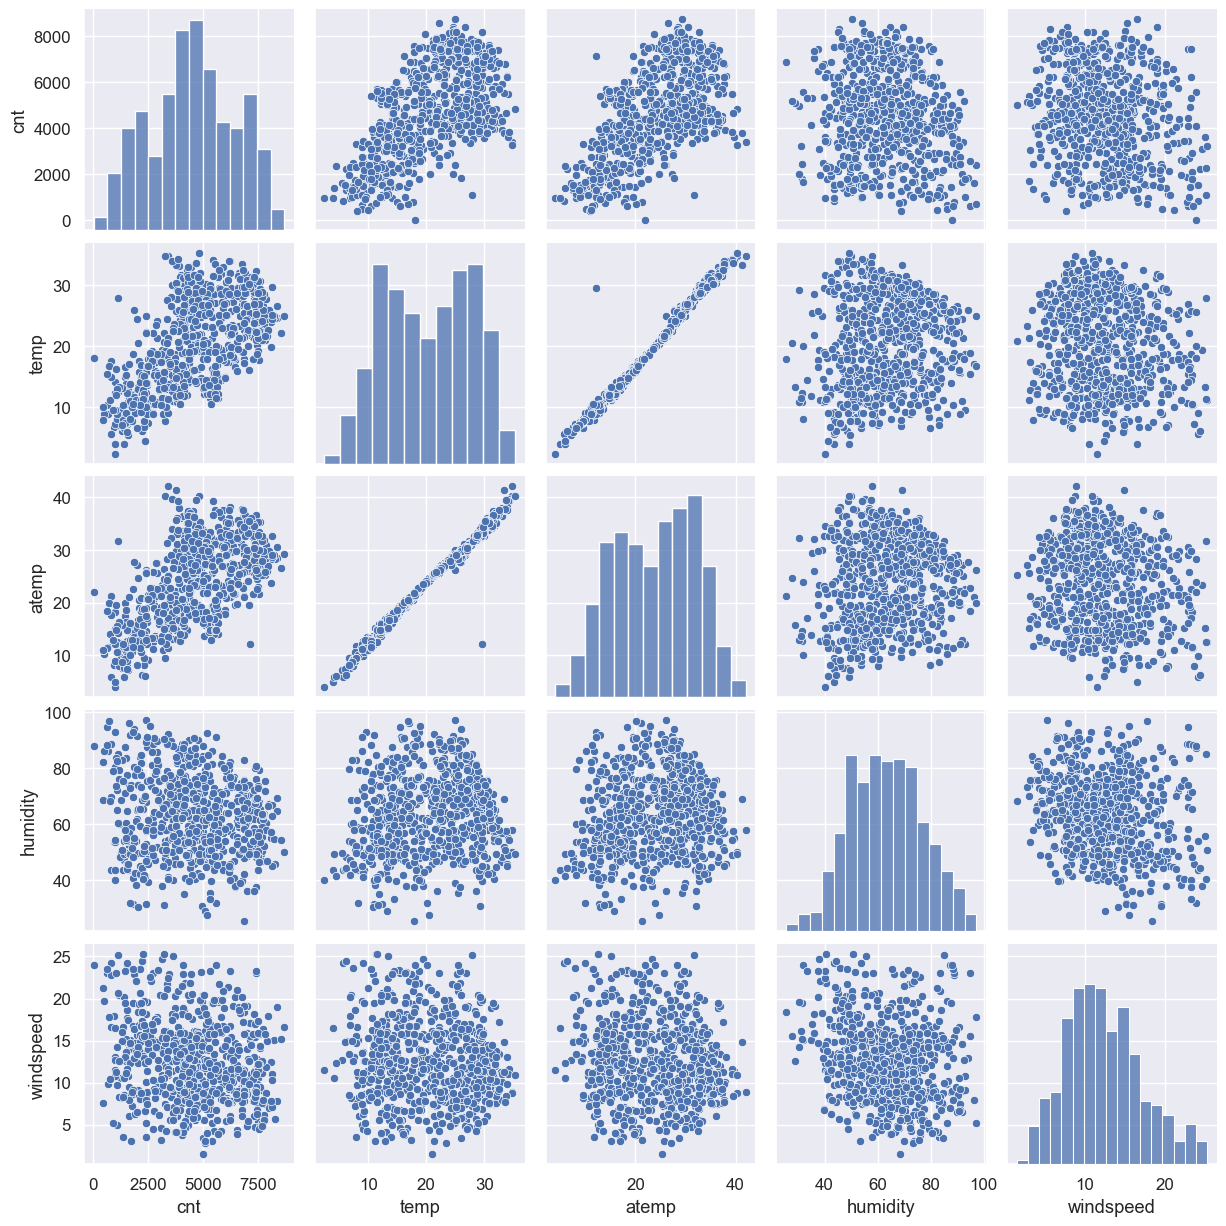

In [502]:
sea.pairplot(data=df,vars=numerical_columns)
plot.show()

In [503]:
# Dummy variable creation for month, weekday, weathersit and season variables.
seasons_df=pd.get_dummies(df.season,drop_first=True,dtype=int)
months_df=pd.get_dummies(df.month,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True,dtype=int)

In [504]:
type(seasons_df)


pandas.core.frame.DataFrame

In [505]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,seasons_df,months_df,weekdays_df,weathersit_df],axis=1)

In [506]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,spring,0,jan,0,mon,1,sunny,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,spring,0,jan,0,tue,1,sunny,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,spring,0,jan,0,wed,1,sunny,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [507]:
# dropping unnecessary columns as we have already created dummy variable out of it.
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [508]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [509]:
df_new = df_new.reindex(columns=[col for col in df_new.columns if col != 'cnt'] + ['cnt'])

In [510]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1600


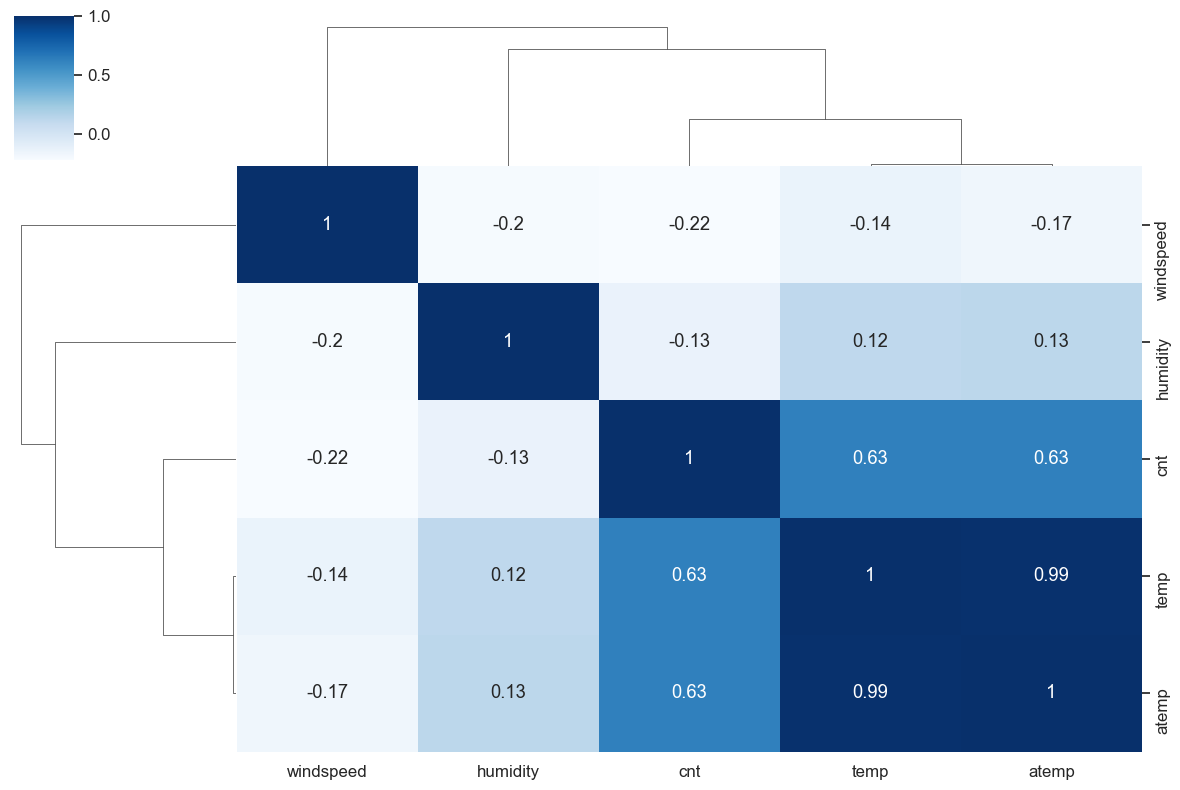

In [511]:
numerical_columns = ['temp','atemp','humidity','windspeed','cnt']
corr = df_new[numerical_columns].corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [512]:
cnt_corr = corr['cnt']
cnt_corr.sort_values(ascending=False)

cnt          1.000000
atemp        0.628802
temp         0.625421
humidity    -0.134521
windspeed   -0.216685
Name: cnt, dtype: float64

In [513]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        716 non-null    int64  
 1   holiday     716 non-null    int64  
 2   workingday  716 non-null    int64  
 3   temp        716 non-null    float64
 4   atemp       716 non-null    float64
 5   humidity    716 non-null    float64
 6   windspeed   716 non-null    float64
 7   spring      716 non-null    int64  
 8   summer      716 non-null    int64  
 9   winter      716 non-null    int64  
 10  aug         716 non-null    int64  
 11  dec         716 non-null    int64  
 12  feb         716 non-null    int64  
 13  jan         716 non-null    int64  
 14  july        716 non-null    int64  
 15  june        716 non-null    int64  
 16  mar         716 non-null    int64  
 17  may         716 non-null    int64  
 18  nov         716 non-null    int64  
 19  oct         716 non-null    int64 

# Split data into training and testing sets:


In [514]:
train_set,test_set=train_test_split(df_new,test_size=0.30,random_state=100)

In [515]:
train_set.shape

(501, 30)

In [516]:
test_set.shape

(215, 30)

In [517]:
train_set.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny,cnt
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1796
541,1,0,1,25.864153,29.73520,37.3333,23.292014,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,7442
116,0,0,1,25.420000,28.75710,83.5417,20.917400,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3872
718,1,0,1,13.530000,16.76085,66.7917,8.875021,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4128
496,1,0,0,23.130847,27.24085,48.0417,8.249911,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,7429


In [518]:
test_set.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny,cnt
583,1,0,1,30.169153,34.88105,70.3750,7.832836,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7273
493,1,0,1,23.575000,27.65125,74.4167,14.499604,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,4717
294,0,0,0,17.322500,21.27460,62.9167,6.208669,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,4308
157,0,0,1,29.007500,32.79750,59.7917,12.583136,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,4833
670,1,0,1,14.555000,17.80210,52.2083,17.833725,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,5847


In [549]:
def buildmodel(X_train,y_train,X_test,y_test):
    # Statsmodels OLS
    #X_train_sm = sm.add_constant(X_train, prepend=True)
    X_train_sm = sm.add_constant(X_train)
    model= sm.OLS(y_train, X_train_sm).fit()
    print(model.summary())
    get_vif(X_train)
    return model

In [520]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(train):
    vif = pd.DataFrame()
    vif['Features'] = train.columns
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [545]:

def plot_error_terms(y_train, y_train_price):
    """
    Plot the error terms (residuals) from a regression model.

    Parameters:
    y_train (array-like): Actual target values (dependent variable)
    y_train_price (array-like): Predicted target values (dependent variable)

    Returns:
    None
    """
    # Create a new figure
    fig = plot.figure()

    # Calculate the error terms
    error_terms = y_train - y_train_price

    # Create a distribution plot of the error terms
    sea.distplot(error_terms, bins=20)

    # Set the title and x-label
    fig.suptitle('Error Terms', fontsize=20)
    plot.xlabel('Errors', fontsize=18)

    # Show the plot
    plot.show()

In [551]:
def initate_model_training(train_array,test_array):
    try:
        print('Splitting Dependent and Independent variables from train and test data')
        
        X_train, y_train, X_test, y_test = (
                train_array.iloc[:,:-1],
                train_array.iloc[:, -1],
                test_array.iloc[:,:-1],
                test_array.iloc[:, -1]
            )
        
            
        return buildmodel(X_train,y_train,X_test,y_test)
    except Exception as e:
            print('Exception occured at Model Training')
            print('Error Message: ', str(e))

# Let  Scale the continuous variables

In [522]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
#Use Normalized scaler to scale
scaler = MinMaxScaler()
#Fit and transform training set only
train_set[num_vars] = scaler.fit_transform(train_set[num_vars])

In [523]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
#Use Normalized scaler to scale
scaler = MinMaxScaler()
#Fit and transform training set only
test_set[num_vars] = scaler.fit_transform(test_set[num_vars])

# After Scale the variable check the sample data

In [524]:
train_set.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny,cnt
728,1,0,0,0.252441,0.204242,0.293114,0.923102,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.204096
541,1,0,1,0.733702,0.689995,0.126342,0.914353,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0.853659
116,0,0,1,0.719799,0.663818,0.826912,0.814718,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.442936
718,1,0,1,0.347624,0.342763,0.572964,0.309436,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.472388
496,1,0,0,0.648145,0.623239,0.288693,0.283207,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0.852163


In [525]:
test_set.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny,cnt
583,1,0,1,0.835542,0.806922,0.625870,0.244339,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.869986
493,1,0,1,0.625343,0.612063,0.682135,0.570231,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.544505
294,0,0,0,0.426035,0.440199,0.522042,0.164945,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0.492423
157,0,0,1,0.798513,0.750766,0.478539,0.476548,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0.559277
670,1,0,1,0.337816,0.346608,0.372969,0.733212,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.688399


In [526]:
initate_model_training(train_set,test_set)

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     104.9
Date:                Tue, 28 May 2024   Prob (F-statistic):          5.63e-183
Time:                        20:42:42   Log-Likelihood:                 529.38
No. Observations:                 501   AIC:                            -1001.
Df Residuals:                     472   BIC:                            -878.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Remove columns with high VIF (> 5 )

In [527]:
train_set=train_set.drop(columns=['summer', 'aug','oct'])
test_set=test_set.drop(columns=['summer', 'aug','oct'])
initate_model_training(train_set,test_set)

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     118.0
Date:                Tue, 28 May 2024   Prob (F-statistic):          6.24e-186
Time:                        20:43:27   Log-Likelihood:                 529.04
No. Observations:                 501   AIC:                            -1006.
Df Residuals:                     475   BIC:                            -896.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [528]:
train_set=train_set.drop(columns=['atemp'])
test_set=test_set.drop(columns=['atemp'])
initate_model_training(train_set,test_set)

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     122.8
Date:                Tue, 28 May 2024   Prob (F-statistic):          1.00e-186
Time:                        20:43:39   Log-Likelihood:                 528.41
No. Observations:                 501   AIC:                            -1007.
Df Residuals:                     476   BIC:                            -901.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [529]:
train_set=train_set.drop(columns=['june','july'])
test_set=test_set.drop(columns=['june','july'])
initate_model_training(train_set,test_set)

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     133.3
Date:                Tue, 28 May 2024   Prob (F-statistic):          5.23e-188
Time:                        20:45:43   Log-Likelihood:                 526.36
No. Observations:                 501   AIC:                            -1007.
Df Residuals:                     478   BIC:                            -909.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [530]:
train_set=train_set.drop(columns=['wed'])
test_set=test_set.drop(columns=['wed'])
initate_model_training(train_set,test_set)

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     139.9
Date:                Tue, 28 May 2024   Prob (F-statistic):          4.51e-189
Time:                        20:46:27   Log-Likelihood:                 526.32
No. Observations:                 501   AIC:                            -1009.
Df Residuals:                     479   BIC:                            -915.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [531]:
train_set=train_set.drop(columns=['feb','mar'])
test_set=test_set.drop(columns=['feb','mar'])
initate_model_training(train_set,test_set)

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     153.4
Date:                Tue, 28 May 2024   Prob (F-statistic):          3.53e-190
Time:                        20:47:43   Log-Likelihood:                 523.70
No. Observations:                 501   AIC:                            -1007.
Df Residuals:                     481   BIC:                            -923.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [532]:
# dec          859.3630    203.152      4.230      0.000     460.189    1258.537
# feb         1312.9424    307.714      4.267      0.000     708.312    1917.573
train_set=train_set.drop(columns=['tue'])
test_set=test_set.drop(columns=['tue'])
initate_model_training(train_set,test_set)   

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     161.7
Date:                Tue, 28 May 2024   Prob (F-statistic):          5.46e-191
Time:                        20:48:39   Log-Likelihood:                 522.98
No. Observations:                 501   AIC:                            -1008.
Df Residuals:                     482   BIC:                            -927.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [533]:
train_set=train_set.drop(columns=['thu'])
test_set=test_set.drop(columns=['thu'])
initate_model_training(train_set,test_set)  

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     170.8
Date:                Tue, 28 May 2024   Prob (F-statistic):          1.02e-191
Time:                        20:49:38   Log-Likelihood:                 522.03
No. Observations:                 501   AIC:                            -1008.
Df Residuals:                     483   BIC:                            -932.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [534]:
train_set=train_set.drop(columns=['holiday'])
test_set=test_set.drop(columns=['holiday'])
initate_model_training(train_set,test_set) 

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     170.8
Date:                Tue, 28 May 2024   Prob (F-statistic):          1.02e-191
Time:                        20:51:06   Log-Likelihood:                 522.03
No. Observations:                 501   AIC:                            -1008.
Df Residuals:                     483   BIC:                            -932.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [535]:
train_set=train_set.drop(columns=['sun'])
test_set=test_set.drop(columns=['sun'])
initate_model_training(train_set,test_set)  

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     181.1
Date:                Tue, 28 May 2024   Prob (F-statistic):          1.75e-192
Time:                        20:51:50   Log-Likelihood:                 521.14
No. Observations:                 501   AIC:                            -1008.
Df Residuals:                     484   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [536]:
train_set=train_set.drop(columns=['humidity'])
test_set=test_set.drop(columns=['humidity'])
initate_model_training(train_set,test_set)   

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     184.3
Date:                Tue, 28 May 2024   Prob (F-statistic):          2.96e-189
Time:                        20:52:21   Log-Likelihood:                 510.68
No. Observations:                 501   AIC:                            -989.4
Df Residuals:                     485   BIC:                            -921.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

Splitting Dependent and Independent variables from train and test data
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     139.6
Date:                Tue, 28 May 2024   Prob (F-statistic):          4.08e-160
Time:                        23:18:22   Log-Likelihood:                 438.39
No. Observations:                 501   AIC:                            -846.8
Df Residuals:                     486   BIC:                            -783.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

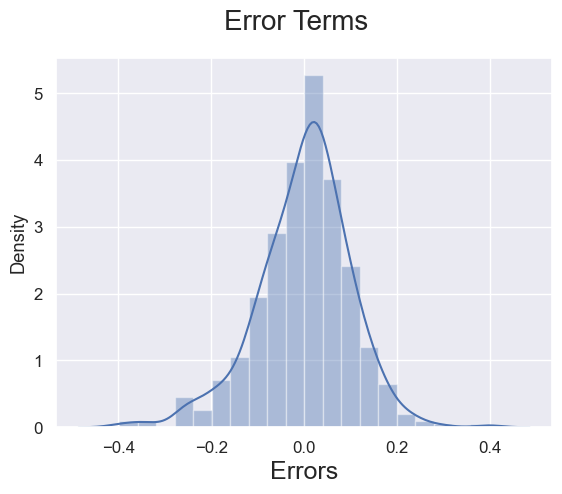

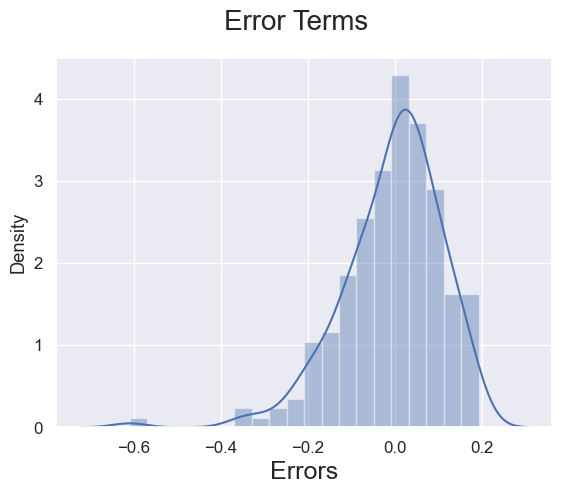

In [556]:
#train_set=train_set.drop(columns=['temp'])
#test_set=test_set.drop(columns=['temp'])
model=initate_model_training(train_set,test_set)
X_train, y_train, X_test, y_test = (
                train_set.iloc[:,:-1],
                train_set.iloc[:, -1],
                test_set.iloc[:,:-1],
                test_set.iloc[:, -1]
            )
y_train_pred= model.predict(sm.add_constant(X_train))
plot_error_terms(y_train,y_train_pred)
# Predict Testing data
y_test_pred =model.predict(sm.add_constant(X_test))
plot_error_terms(y_test,y_test_pred)